<a href="https://colab.research.google.com/github/9Pawel3/Data-Science-and-Machine-Learning/blob/main/KNN%20model%20-%20Wine%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Load librariers and dataset
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

wine = datasets.load_wine()

In [2]:
# Transform data to dataframe
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])

In [3]:
# Include target column
df["target"] = wine["target"]

In [34]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
# Evaluate data
df.shape
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [15]:
# Split data into variables and target and train / test sets
y = df["target"]
X = df.drop(["target"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
# Train the model and check the accuracy
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.7222222222222222

In [18]:
# Evaluate what number of neighbors is the most efficient for the model

k_range = range(1, 25)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))


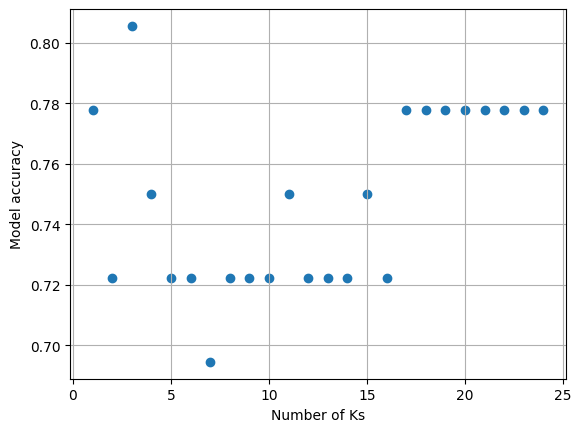

In [26]:
# Visualise model efficiency based on the number of neighbors

plt.figure()
plt.xlabel('Number of Ks')
plt.ylabel('Model accuracy')
plt.scatter(k_range, scores)
plt.grid()
plt.show()

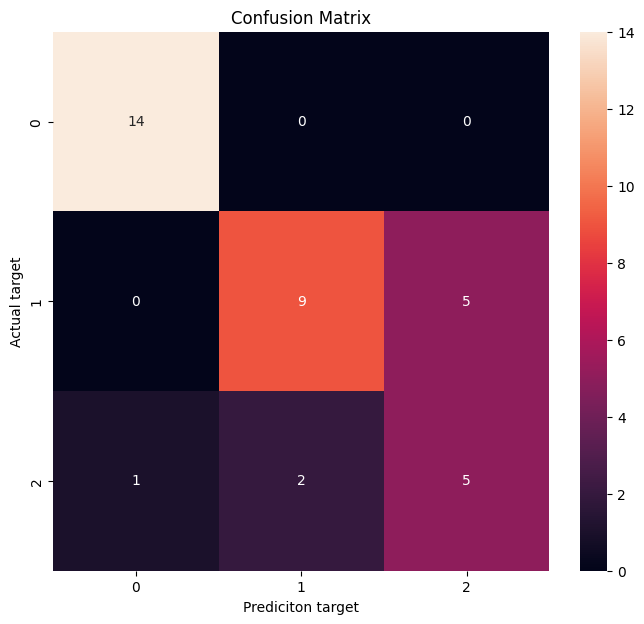

In [33]:
# Make predictions and visualise predictions and actual values
predictions = knn.predict(X_test)
predictions

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.ylabel('Actual target')
plt.xlabel('Prediciton target')
plt.show()